In [20]:
from basicsr.archs.rrdbnet_arch import RRDBNet
from basicsr.utils.download_util import load_file_from_url

from realesrgan import RealESRGANer
from realesrgan.archs.srvgg_arch import SRVGGNetCompact
import cv2
from gfpgan import GFPGANer

In [21]:
model = RRDBNet(num_in_ch=3, num_out_ch=3, num_feat=64, num_block=23, num_grow_ch=32, scale=4)
netscale = 4

In [22]:
# model_path  = r"./weights/RealESRGAN_x4plus.pth"
model_path = r"D:\wickkiey_git\Real-ESRGAN\experiments\debug_finetune_RealESRGANx4plus_vb\models\net_g_latest.pth"

In [23]:
upsampler = RealESRGANer(
        scale=netscale,
        model_path=model_path,
        dni_weight=None,
        model=model,
        tile=0,
        tile_pad=10,
        pre_pad=0,
        half=not True,
        gpu_id=None)

In [24]:
face_enhancer = GFPGANer(
            model_path='https://github.com/TencentARC/GFPGAN/releases/download/v1.3.0/GFPGANv1.3.pth',
            upscale=4,
            arch='clean',
            channel_multiplier=2,
            bg_upsampler=upsampler)

In [33]:
img = cv2.imread(r"D:\wickkiey_git\image_datasets\vg\img_frame100080.jpg")
img = cv2.resize(img, (1920//4, 1080//4))
_, _, output = face_enhancer.enhance(img, has_aligned=False, only_center_face=False, paste_back=True)

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

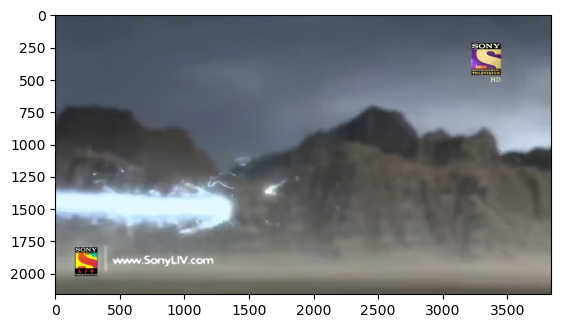

In [35]:
plt.imshow(output[:,:,::-1])

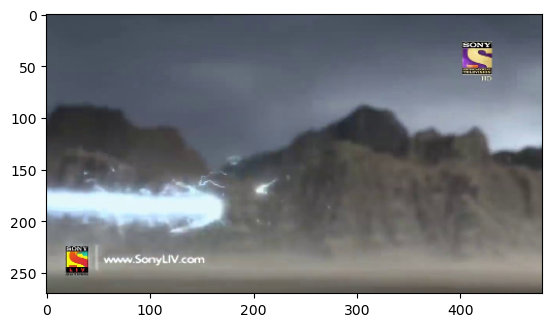

In [32]:
# img bgr to rgb
img = img[:,:,::-1]
plt.imshow(img)